In [1]:
#!pip install -U scikit-learn

In [2]:
#import sklearn

#sklearn.__version__

# **Start**

In [3]:
import pandas as pd

df = pd.read_csv("/content/ResaleflatpricesbasedonregistrationdatefromJan2017onwards (1).csv")
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...,...,...,...
185901,2024-07,YISHUN,EXECUTIVE,359,YISHUN RING RD,10 TO 12,145.0,Apartment,1988,63 years 01 month,880000.0
185902,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,146.0,Maisonette,1985,60 years 03 months,770000.0
185903,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,60 years 02 months,800000.0
185904,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,146.0,Maisonette,1985,60 years 02 months,775000.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185906 entries, 0 to 185905
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                185906 non-null  object 
 1   town                 185906 non-null  object 
 2   flat_type            185906 non-null  object 
 3   block                185906 non-null  object 
 4   street_name          185906 non-null  object 
 5   storey_range         185906 non-null  object 
 6   floor_area_sqm       185906 non-null  float64
 7   flat_model           185906 non-null  object 
 8   lease_commence_date  185906 non-null  int64  
 9   remaining_lease      185906 non-null  object 
 10  resale_price         185906 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 15.6+ MB


In [5]:
df.isnull().sum()

,0
month,0
town,0
flat_type,0
block,0
street_name,0
storey_range,0
floor_area_sqm,0
flat_model,0
lease_commence_date,0
remaining_lease,0


In [6]:
df['remaining_lease'].unique()

array(['61 years 04 months', '60 years 07 months', '62 years 05 months',
       '62 years 01 month', '63 years', '61 years 06 months',
       '58 years 04 months', '59 years 08 months', '59 years 06 months',
       '60 years', '62 years 08 months', '61 years', '60 years 10 months',
       '59 years 03 months', '61 years 05 months', '60 years 04 months',
       '62 years', '60 years 03 months', '63 years 09 months',
       '61 years 01 month', '61 years 10 months', '58 years 06 months',
       '59 years 04 months', '62 years 11 months', '60 years 08 months',
       '93 years 08 months', '93 years 07 months', '60 years 01 month',
       '94 years 08 months', '78 years 04 months', '60 years 06 months',
       '62 years 06 months', '58 years', '70 years 08 months',
       '63 years 04 months', '63 years 06 months', '67 years 07 months',
       '61 years 07 months', '68 years 02 months', '68 years 03 months',
       '56 years', '67 years 09 months', '67 years 05 months',
       '63 years 07

In [7]:
df['sold_year'] = df['month'].apply(lambda x: x[:4])
df['sold_year'] = df['sold_year'].astype(int)
df['remaining_lease']= (df['lease_commence_date'] + 99) - df['sold_year']
df['remaining_lease'] = df['remaining_lease'].astype(int)
df['age'] = 99 - df['remaining_lease']
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,sold_year,age
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61,232000.0,2017,38
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60,250000.0,2017,39
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,262000.0,2017,37
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62,265000.0,2017,37
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,265000.0,2017,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185901,2024-07,YISHUN,EXECUTIVE,359,YISHUN RING RD,10 TO 12,145.0,Apartment,1988,63,880000.0,2024,36
185902,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,146.0,Maisonette,1985,60,770000.0,2024,39
185903,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,1985,60,800000.0,2024,39
185904,2024-07,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,146.0,Maisonette,1985,60,775000.0,2024,39


In [8]:
df.drop(['month','lease_commence_date','sold_year'],axis=1,inplace=True)
df

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,remaining_lease,resale_price,age
0,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,61,232000.0,38
1,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,60,250000.0,39
2,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,62,262000.0,37
3,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,62,265000.0,37
4,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,62,265000.0,37
...,...,...,...,...,...,...,...,...,...,...
185901,YISHUN,EXECUTIVE,359,YISHUN RING RD,10 TO 12,145.0,Apartment,63,880000.0,36
185902,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,146.0,Maisonette,60,770000.0,39
185903,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,60,800000.0,39
185904,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,146.0,Maisonette,60,775000.0,39


# **Checking correlation and association of columns**

**Visualizing Continous column association**

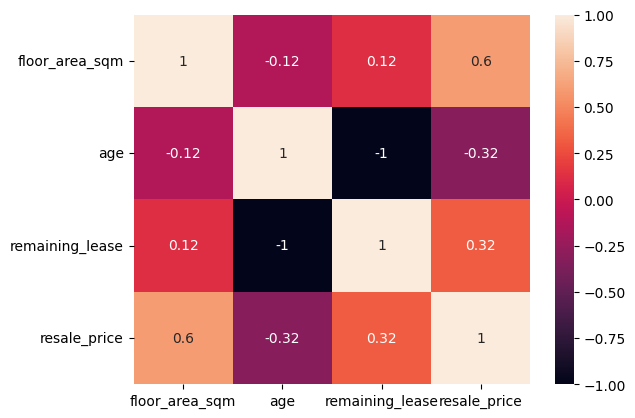

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

c = df[['floor_area_sqm','age','remaining_lease','resale_price']].corr()
sns.heatmap(c,annot=True)
plt.show()

**Categorical column association**

In [10]:
# creating categorical target variable
df['resale_price_binned'] = pd.cut(df['resale_price'], bins=3, labels=['Low', 'Medium', 'High'])
df

,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,remaining_lease,resale_price,age,resale_price_binned
0,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,61,232000.0,38,Low
1,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,60,250000.0,39,Low
2,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,62,262000.0,37,Low
3,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,62,265000.0,37,Low
4,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,62,265000.0,37,Low
...,...,...,...,...,...,...,...,...,...,...,...
185901,YISHUN,EXECUTIVE,359,YISHUN RING RD,10 TO 12,145.0,Apartment,63,880000.0,36,Medium
185902,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,146.0,Maisonette,60,770000.0,39,Medium
185903,YISHUN,EXECUTIVE,277,YISHUN ST 22,04 TO 06,146.0,Maisonette,60,800000.0,39,Medium
185904,YISHUN,EXECUTIVE,277,YISHUN ST 22,01 TO 03,146.0,Maisonette,60,775000.0,39,Medium


In [11]:
#this chi2_contingency: (null hypothesis)= no column is significantly different and (alternate hypothesis)= columns are significantly different
# **critical value = 0.05**

import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

categorical_columns = ['town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model']
target_column = 'resale_price_binned'

chi2_results = pd.DataFrame(index=categorical_columns, columns=['p-value'])

for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df[target_column])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    chi2_results.loc[col, 'p-value'] = p

print(chi2_results)

             p-value
town             0.0
flat_type        0.0
block            0.0
street_name      0.0
storey_range     0.0
flat_model       0.0


**Cramér's V is a normalized version of the chi-squared statistic and ranges from 0 to 1, where 0 indicates no association and 1 indicates a perfect association.**

             Cramér_Score
town             0.252738
flat_type        0.307415
block            0.407255
street_name      0.440765
storey_range     0.280481
flat_model       0.372911


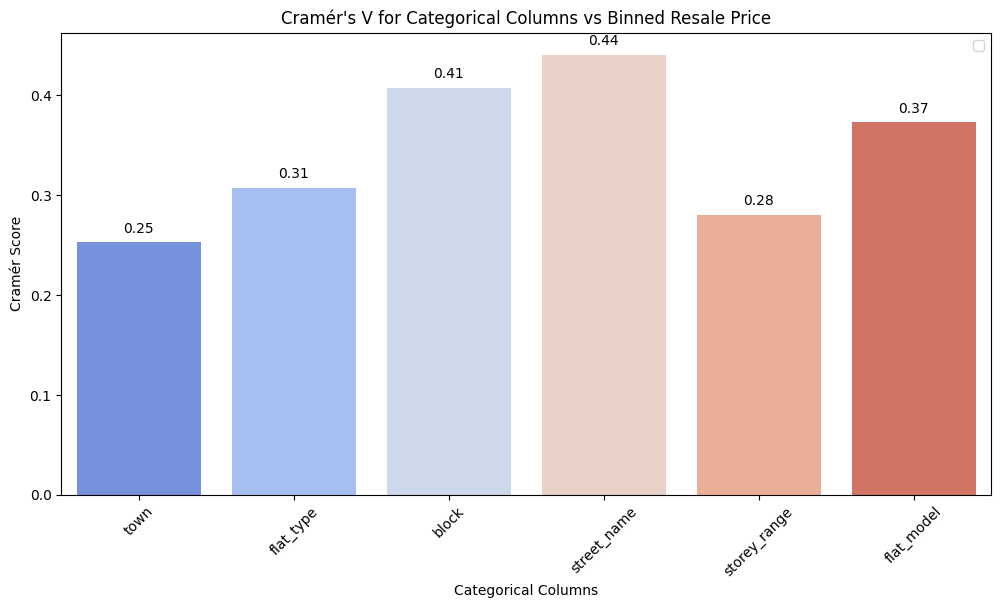

In [12]:
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

categorical_columns = ['town', 'flat_type', 'block', 'street_name', 'storey_range', 'flat_model']
target_column = 'resale_price_binned'

cramers_v_results = pd.DataFrame(index=categorical_columns, columns=['Cramér_Score'])


for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df[target_column])
    cramers_v_results.loc[col, 'Cramér_Score'] = cramers_v(contingency_table.values)

print(cramers_v_results)

# Visualize Cramér's V using a bar plot
plt.figure(figsize=(12, 6))
bar_plot = sns.barplot(data=cramers_v_results.reset_index(), x='index', y='Cramér_Score', palette='coolwarm', hue='index', dodge=False)

for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.2f}',
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 10),
                      textcoords='offset points')


plt.title('Cramér\'s V for Categorical Columns vs Binned Resale Price')
plt.ylabel('Cramér Score')
plt.xlabel('Categorical Columns')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# **Checking Skewness**

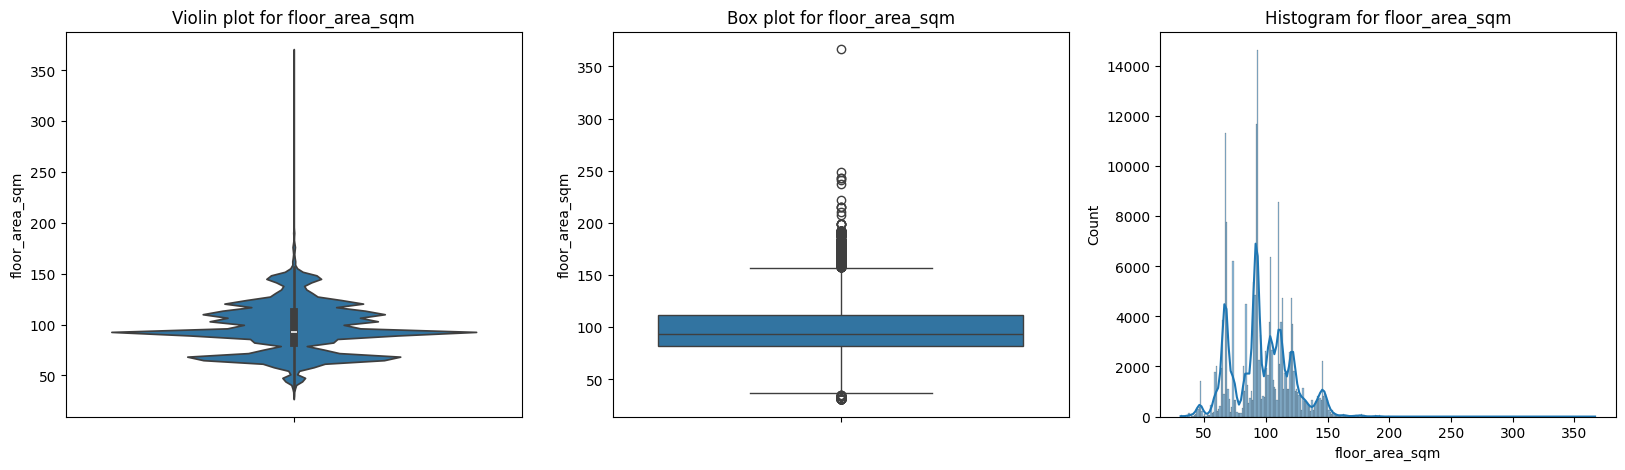

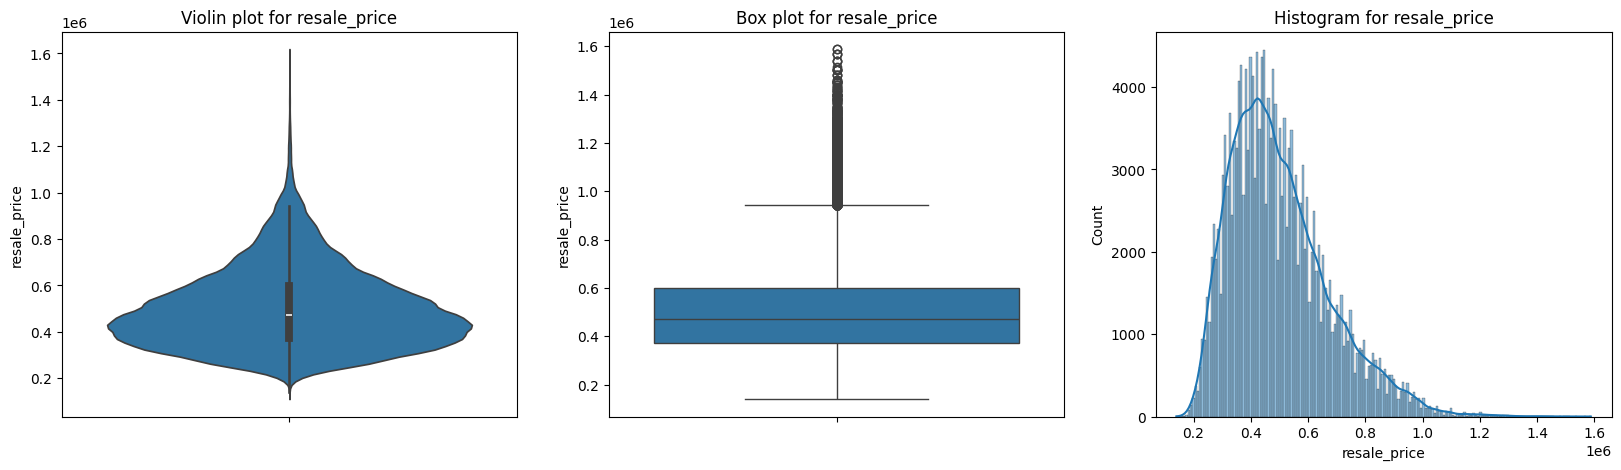

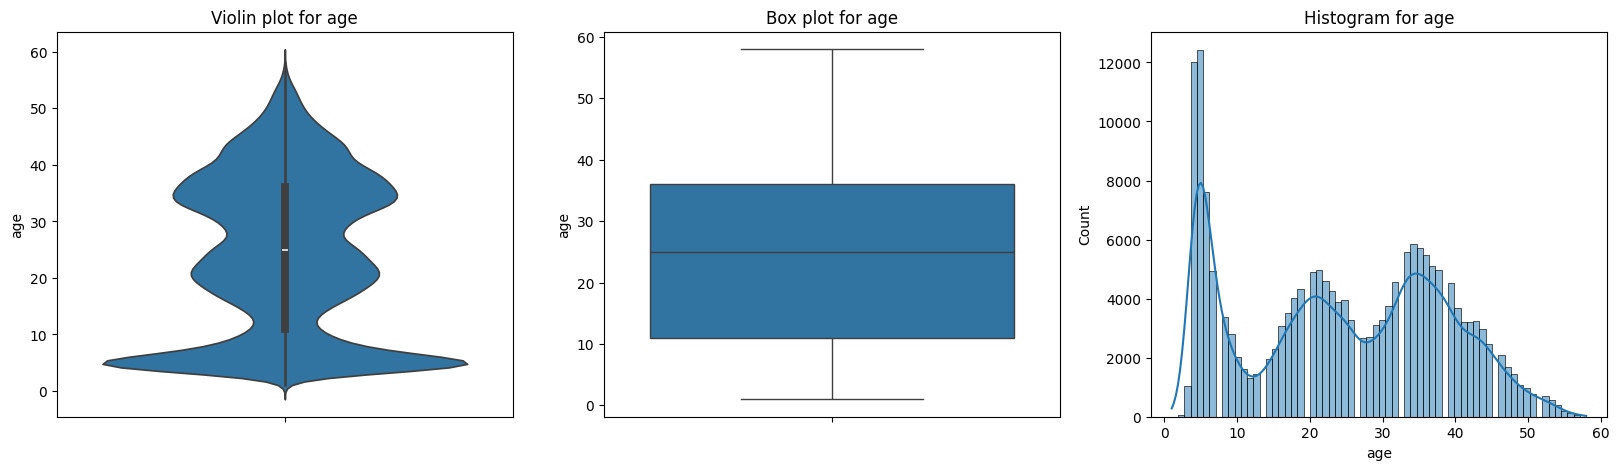

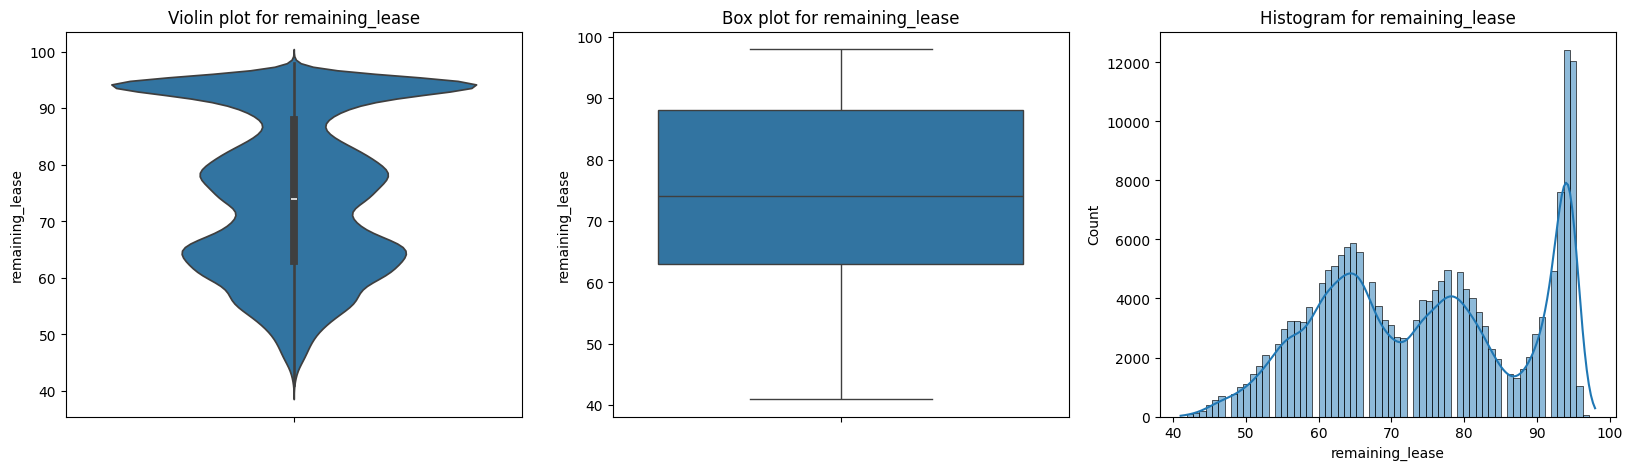

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot(df,col):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    plt.title(f"Violin plot for {col}")
    sns.violinplot(df[col])

    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.title(f"Box plot for {col}")

    plt.subplot(1,3,3)
    sns.histplot(df[col],kde=True)
    plt.title(f"Histogram for {col}")
    plt.show()

for i in ['floor_area_sqm','resale_price','age','remaining_lease']:
    plot(df,i)

In [14]:
from scipy.stats import skew

for i in ['floor_area_sqm','resale_price','age','remaining_lease']:
    print(f"{i} : {skew(df[i])}")

floor_area_sqm : 0.26567336584797585
resale_price : 0.9442016335737883
age : 3.2545574224260875e-05
remaining_lease : -3.254557422347449e-05


**Log transformation**

In [15]:
df['floor_area_sqm'].min(), df['resale_price'].min()

(31.0, 140000.0)

In [16]:
import numpy as np

for i in ['floor_area_sqm','resale_price']:
    df[i] = np.log(df[i])

In [17]:
from scipy.stats import skew

for i in ['floor_area_sqm','resale_price']:
    print(f"{i} : {skew(df[i])}")

floor_area_sqm : -0.4269416372123946
resale_price : 0.06492396915315571


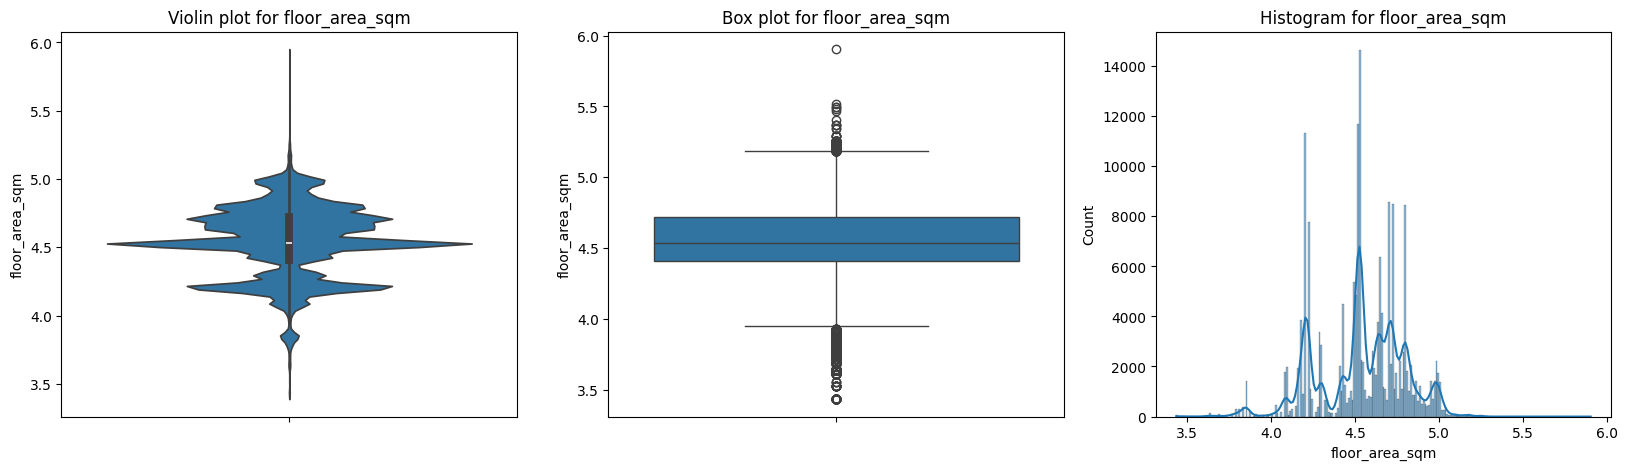

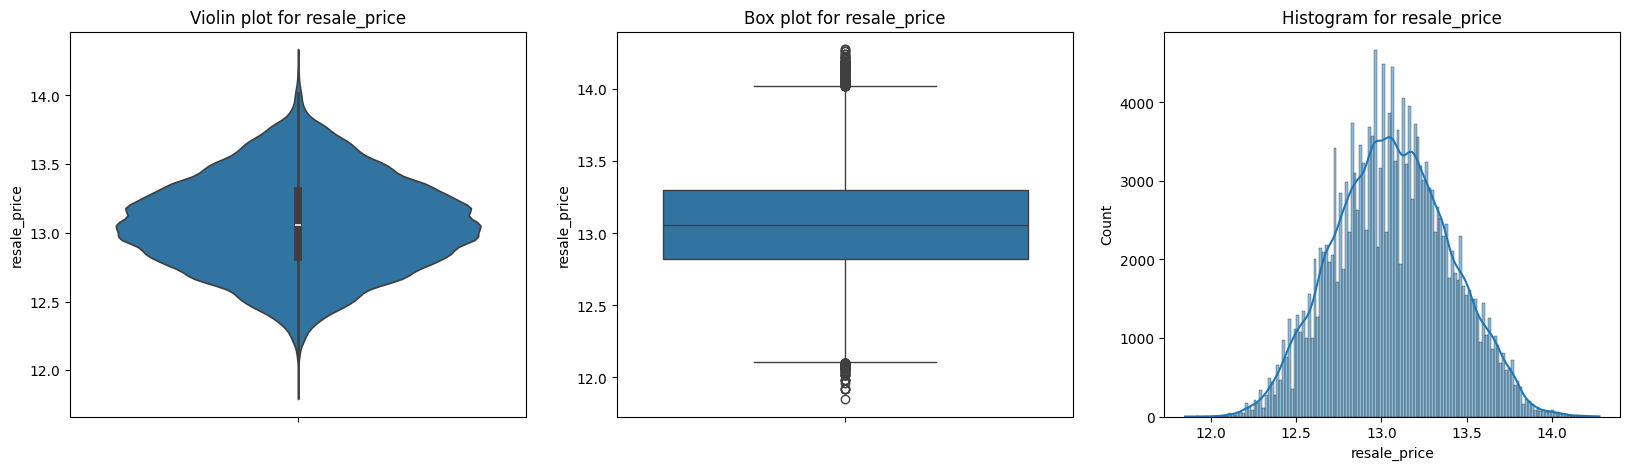

In [18]:
for i in ['floor_area_sqm','resale_price']:
    plot(df,i)

# **Check and remove Outlier**

In [19]:
n = df.copy()

In [20]:
n.shape

(185906, 11)

In [21]:
def remove_outlier(df,column):
  q2 = df[column].median()
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  IQR = q3-q1
  lower_limit = q1 - 1.5 * IQR
  upper_limit = q3 + 1.5 * IQR
  df = df[(df[column] > lower_limit) & (df[column] < upper_limit)]
  return df

for i in ['floor_area_sqm','resale_price']:
  n = remove_outlier(n,i)

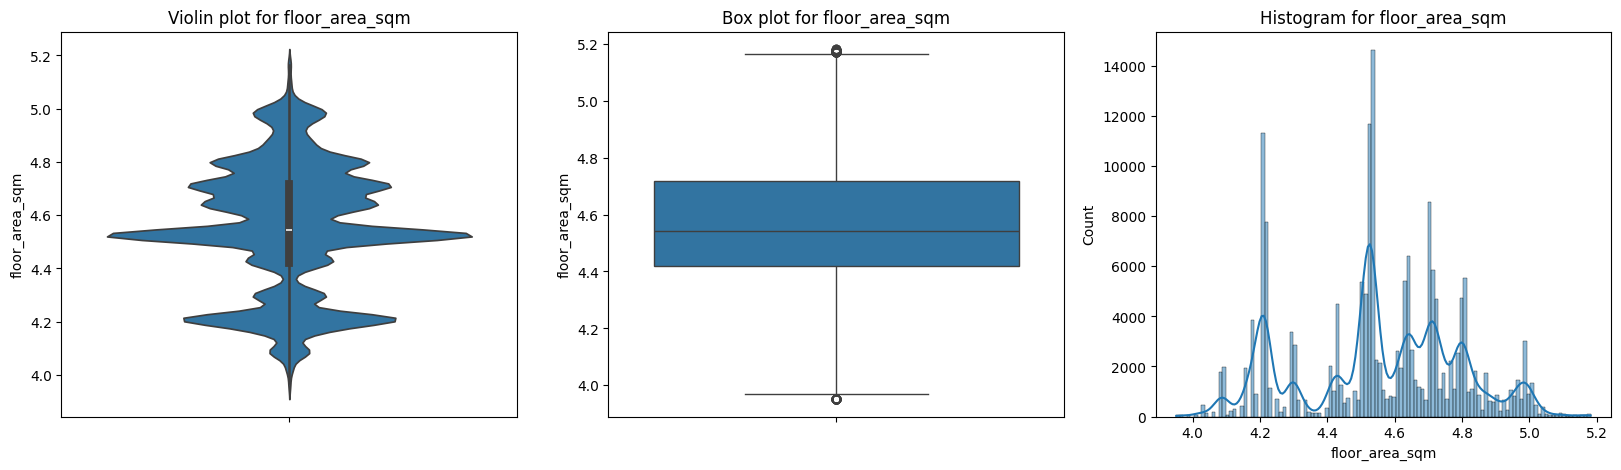

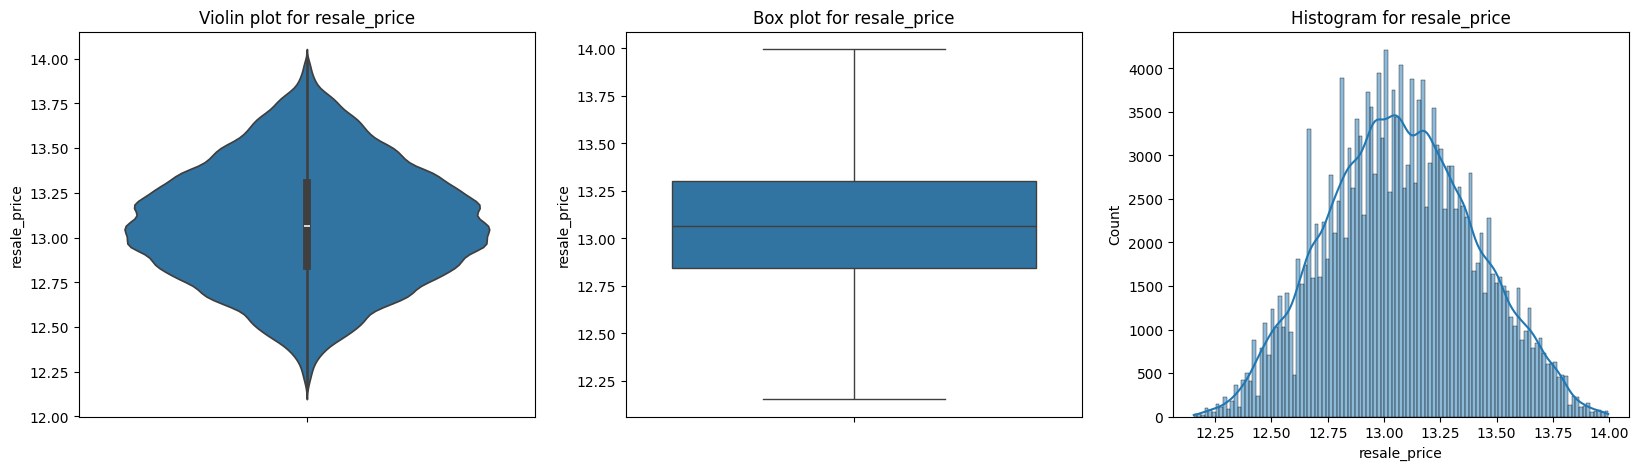

In [22]:
for i in ['floor_area_sqm','resale_price']:
    plot(n,i)

In [23]:
n.shape

(181932, 11)

# **Encoding Categorical Columns**

In [24]:
t = n.drop(['resale_price','resale_price_binned','storey_range'],axis=1)
t

,town,flat_type,block,street_name,floor_area_sqm,flat_model,remaining_lease,age
1,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,4.204693,New Generation,60,39
2,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,4.204693,New Generation,62,37
3,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,4.219508,New Generation,62,37
4,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,4.204693,New Generation,62,37
5,ANG MO KIO,3 ROOM,150,ANG MO KIO AVE 5,4.219508,New Generation,63,36
...,...,...,...,...,...,...,...,...
185901,YISHUN,EXECUTIVE,359,YISHUN RING RD,4.976734,Apartment,63,36
185902,YISHUN,EXECUTIVE,277,YISHUN ST 22,4.983607,Maisonette,60,39
185903,YISHUN,EXECUTIVE,277,YISHUN ST 22,4.983607,Maisonette,60,39
185904,YISHUN,EXECUTIVE,277,YISHUN ST 22,4.983607,Maisonette,60,39


In [25]:
t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 181932 entries, 1 to 185905
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   town             181932 non-null  object 
 1   flat_type        181932 non-null  object 
 2   block            181932 non-null  object 
 3   street_name      181932 non-null  object 
 4   floor_area_sqm   181932 non-null  float64
 5   flat_model       181932 non-null  object 
 6   remaining_lease  181932 non-null  int64  
 7   age              181932 non-null  int64  
dtypes: float64(1), int64(2), object(5)
memory usage: 12.5+ MB


In [26]:
from sklearn.preprocessing import LabelEncoder

flat_type_le = LabelEncoder()
town_le = LabelEncoder()
flat_model_le = LabelEncoder()
block_le = LabelEncoder()
street_le = LabelEncoder()

t['flat_type'] = flat_type_le.fit_transform(t['flat_type'])
t['town'] = town_le.fit_transform(t['town'])
t['flat_model'] = flat_model_le.fit_transform(t['flat_model'])
t['block'] = block_le.fit_transform(t['block'])
t['street_name'] = street_le.fit_transform(t['street_name'])
t.reset_index(drop=True,inplace=True)
t

,town,flat_type,block,street_name,floor_area_sqm,flat_model,remaining_lease,age
0,0,1,37,16,4.204693,12,60,39
1,0,1,1733,17,4.204693,12,62,37
2,0,1,1321,13,4.219508,12,62,37
3,0,1,1728,17,4.204693,12,62,37
4,0,1,183,17,4.219508,12,63,36
...,...,...,...,...,...,...,...,...
181927,25,4,1028,544,4.976734,3,63,36
181928,25,4,671,548,4.983607,7,60,39
181929,25,4,671,548,4.983607,7,60,39
181930,25,4,671,548,4.983607,7,60,39


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
t[t.columns] = scaler.fit_transform(t)
t

,town,flat_type,block,street_name,floor_area_sqm,flat_model,remaining_lease,age
0,-1.764258,-1.320287,-1.463178,-1.565649,-1.472785,0.933746,-1.042761,1.042761
1,-1.764258,-1.320287,0.760927,-1.559734,-1.472785,0.933746,-0.898228,0.898228
2,-1.764258,-1.320287,0.220637,-1.583392,-1.410676,0.933746,-0.898228,0.898228
3,-1.764258,-1.320287,0.754370,-1.559734,-1.472785,0.933746,-0.898228,0.898228
4,-1.764258,-1.320287,-1.271716,-1.559734,-1.410676,0.933746,-0.825962,0.825962
...,...,...,...,...,...,...,...,...
181927,1.388845,2.097830,-0.163598,1.557180,1.763833,-1.570135,-0.825962,0.825962
181928,1.388845,2.097830,-0.631761,1.580838,1.792646,-0.457299,-1.042761,1.042761
181929,1.388845,2.097830,-0.631761,1.580838,1.792646,-0.457299,-1.042761,1.042761
181930,1.388845,2.097830,-0.631761,1.580838,1.792646,-0.457299,-1.042761,1.042761


# **Model Training**

In [28]:
y = n['resale_price']
X = t
X

,town,flat_type,block,street_name,floor_area_sqm,flat_model,remaining_lease,age
0,-1.764258,-1.320287,-1.463178,-1.565649,-1.472785,0.933746,-1.042761,1.042761
1,-1.764258,-1.320287,0.760927,-1.559734,-1.472785,0.933746,-0.898228,0.898228
2,-1.764258,-1.320287,0.220637,-1.583392,-1.410676,0.933746,-0.898228,0.898228
3,-1.764258,-1.320287,0.754370,-1.559734,-1.472785,0.933746,-0.898228,0.898228
4,-1.764258,-1.320287,-1.271716,-1.559734,-1.410676,0.933746,-0.825962,0.825962
...,...,...,...,...,...,...,...,...
181927,1.388845,2.097830,-0.163598,1.557180,1.763833,-1.570135,-0.825962,0.825962
181928,1.388845,2.097830,-0.631761,1.580838,1.792646,-0.457299,-1.042761,1.042761
181929,1.388845,2.097830,-0.631761,1.580838,1.792646,-0.457299,-1.042761,1.042761
181930,1.388845,2.097830,-0.631761,1.580838,1.792646,-0.457299,-1.042761,1.042761


In [30]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score
from xgboost import XGBRegressor

models = [LinearRegression(n_jobs=-1),RandomForestRegressor(n_jobs=-1),DecisionTreeRegressor(),XGBRegressor(n_jobs=-1)]

for model in models:
    model.fit(X_train,y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    print(f"------------------{type(model).__name__}------------------")
    print("Train RMSE:",mean_squared_error(y_train,train_pred,squared=False))
    print("Train R2:",r2_score(y_train,train_pred))
    print("Test RMSE:",mean_squared_error(y_test,test_pred,squared=False))
    print("Test R2:",r2_score(y_test,test_pred))

------------------LinearRegression------------------
Train RMSE: 0.23231602266205414
Train R2: 0.49852870330027454
Test RMSE: 0.2333090040469345
Test R2: 0.4966364701061756


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


------------------RandomForestRegressor------------------
Train RMSE: 0.04185585883593341
Train R2: 0.9837220291117933
Test RMSE: 0.07353944065514047
Test R2: 0.9499897078588085


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


------------------DecisionTreeRegressor------------------
Train RMSE: 0.03729317085139631
Train R2: 0.9870775049679857
Test RMSE: 0.08503203027251277
Test R2: 0.9331373101101015


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


------------------XGBRegressor------------------
Train RMSE: 0.09296109631461408
Train R2: 0.9197046813555216
Test RMSE: 0.09600543692230352
Test R2: 0.9147664840383338


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rfr = RandomForestRegressor()
rfr_para = {'n_estimators': [100,200,300,400,500],
          'max_depth': [50,60,70,80],
          'criterion':['squared_error'],
          'min_samples_split':[8,9,10,11],
          'min_samples_leaf':[1,2,3,4],
          'max_features':['sqrt', 'log2', None],
          }

rfr_grid = RandomizedSearchCV(rfr,rfr_para,cv=5,n_iter=10,n_jobs=-1,verbose=2)
rfr_grid.fit(X_train,y_train)
print("Best Parameters:", rfr_grid.best_params_)
print("Best Score:", rfr_grid.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'n_estimators': 100, 'min_samples_split': 8, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 70, 'criterion': 'squared_error'}
Best Score: 0.9498912856082345


In [33]:
rfr_grid.best_estimator_

RandomForestRegressor(max_depth=70, max_features=None, min_samples_split=8)

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

model = RandomForestRegressor(n_estimators=100,max_depth=70,criterion='squared_error',min_samples_split=8,min_samples_leaf=1,max_features=None)
model.fit(X_train,y_train)
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print(f"------------------{type(model).__name__}------------------")
print("Train RMSE:",mean_squared_error(y_train,train_pred,squared=False))
print("Train R2:",r2_score(y_train,train_pred))
print("Test RMSE:",mean_squared_error(y_test,test_pred,squared=False))
print("Test R2:",r2_score(y_test,test_pred))

------------------RandomForestRegressor------------------
Train RMSE: 0.051393167028248164
Train R2: 0.9754586462961403
Test RMSE: 0.07225150525013807
Test R2: 0.9517260822925684


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [39]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(model,X,y,cv=5)
print(score)
print(score.mean())

[0.89537566 0.92037132 0.91506865 0.88443615 0.78872118]
0.8807945920890724


# **Saving Model**

In [38]:
import pickle

#model
with open('Singapore_model.pkl','wb') as f:
    pickle.dump(model,f)

#scaler
with open('scaler.pkl','wb') as f:
    pickle.dump(scaler,f)

#label encoder
with open('flat_type_le.pkl','wb') as f:
    pickle.dump(flat_type_le,f)

with open('street_le.pkl','wb') as f:
    pickle.dump(street_le,f)

with open('town_le.pkl','wb') as f:
    pickle.dump(town_le,f)

with open('flat_model_le.pkl','wb') as f:
    pickle.dump(flat_model_le,f)

with open('block_le.pkl','wb') as f:
    pickle.dump(block_le,f)

In [40]:
v = model.predict(X_test)
v

array([12.48148524, 13.48020179, 12.85663996, ..., 13.1569834 ,
       13.43160401, 13.35861636])